In [149]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [150]:
tests = [1,2,3,4,5,6,7,8]
result_keys = ['none', 'max-distance', 'std']

In [151]:
def get_results(test_number, result_key):
  result_path = f'results/{result_key}/results{test_number}.json'
  with open(result_path, 'r') as file:
    data = json.load(file)
  return data

In [152]:
def get_points(test_number):
  points_path = {
    'base': f'data/test{test_number}a.csv',
    'transformed': f'data/test{test_number}b.csv',
    'none': f'results/none/test{test_number}.csv',
    'max-distance': f'results/max-distance/test{test_number}.csv',
    'std': f'results/std/test{test_number}.csv'
  }

  points = {}

  for key, value in points_path.items():
    points[key] = {}
    points[key]['points'] = np.loadtxt(value, delimiter=',', skiprows=1)

    if key in result_keys:
      points[key]['results'] = get_results(test_number, key)

  return points

In [153]:
def plot(points, test_number):
  fig, axes = plt.subplots(1, 3, figsize=(18, 6))

  input_keys = {'base': 'green', 'transformed': 'blue'}

  for ax in axes:
    for key, value in input_keys.items():
      input_points = points[key]['points']
      ax.scatter(input_points[:, 0], input_points[:, 1], linestyle='-', marker='o', color=value, s=1, label=key)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(True)


  for index, key in enumerate(result_keys):
    res_points = points[key]['points']
    results = points[key]['results']
    axes[index].scatter(res_points[:, 0], res_points[:, 1], linestyle='-', marker='o', color='red', s=1, label=key)
    axes[index].set_title(key)
    annotation = f'Error = {results['error']}'
    axes[index].annotate(annotation, xy=(0, -0.15), xycoords='axes fraction')

  handles, labels = axes[0].get_legend_handles_labels()

  fig.legend(handles, labels)

  plt.suptitle(f'Test #{test_number}')
  plt.show()

In [154]:
def verify_test(test_number):
  plot(get_points(test_number), test_number)

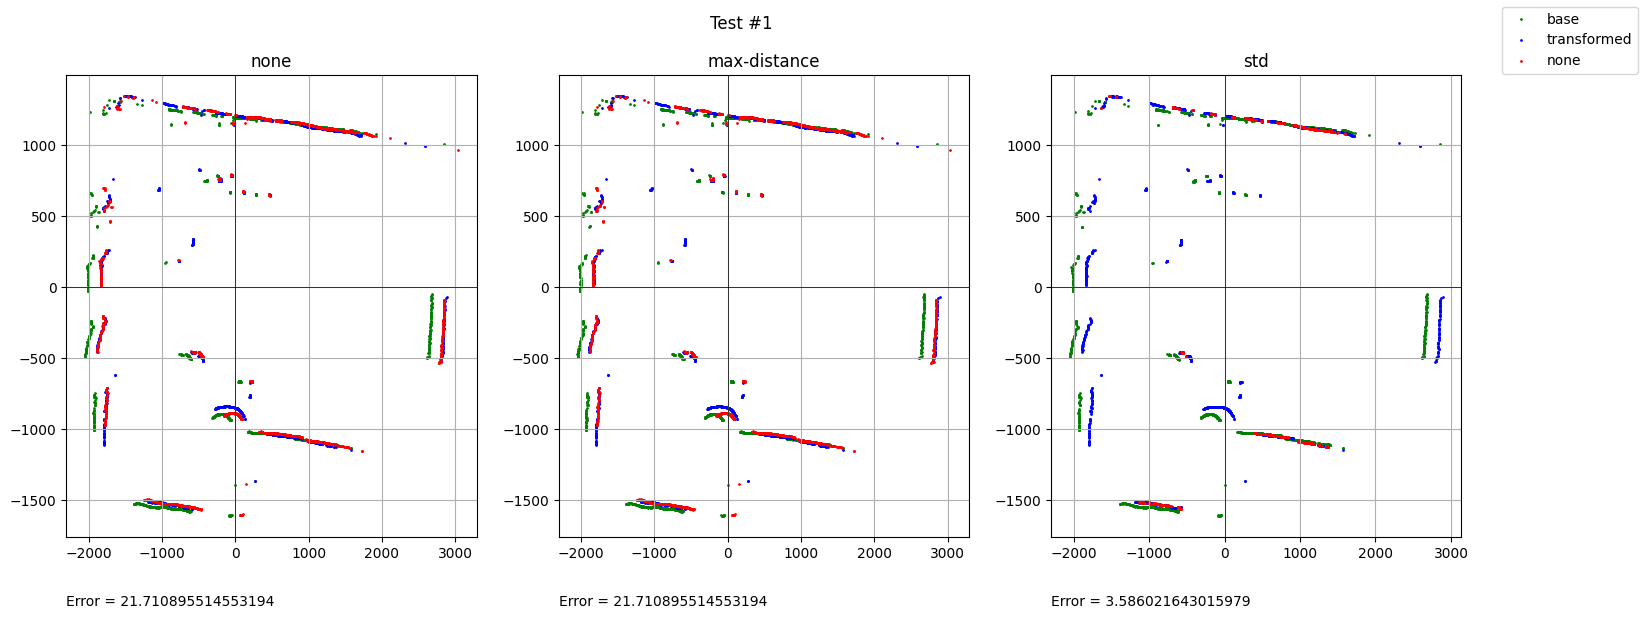

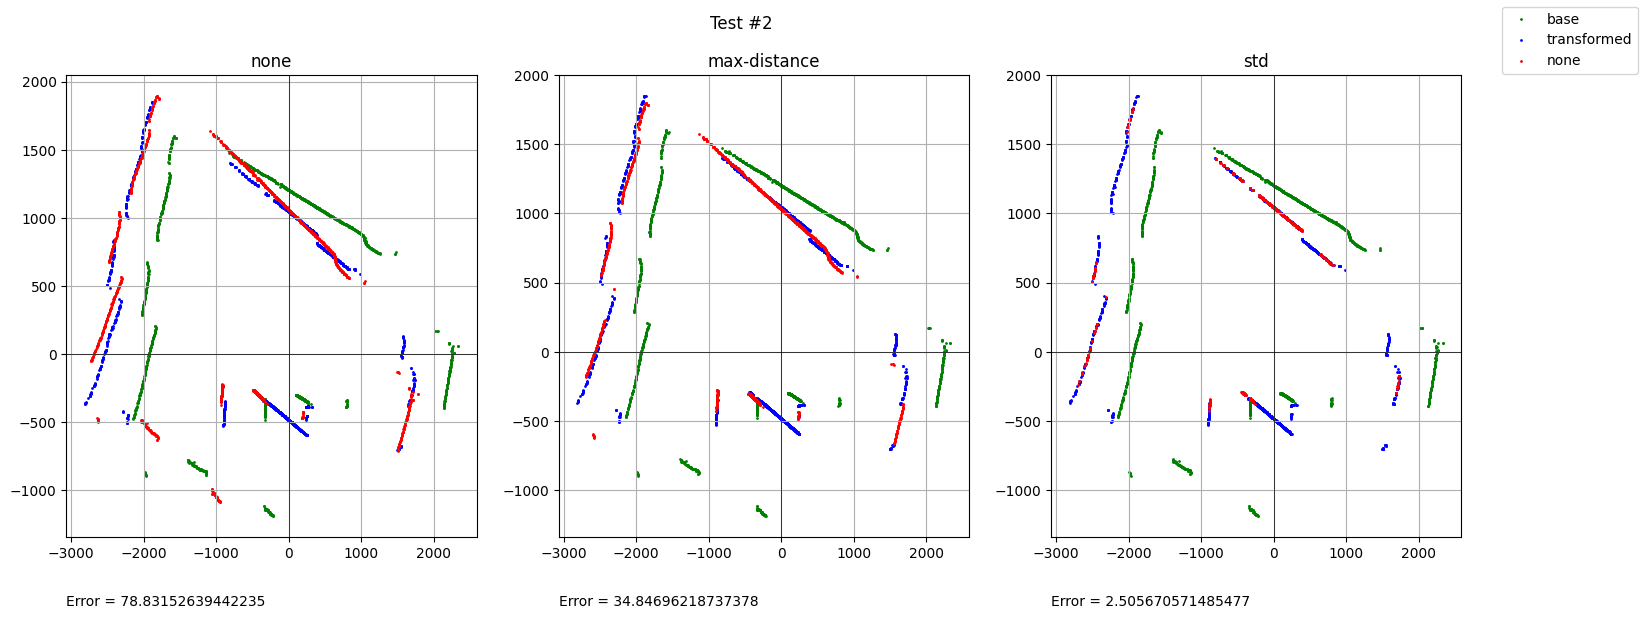

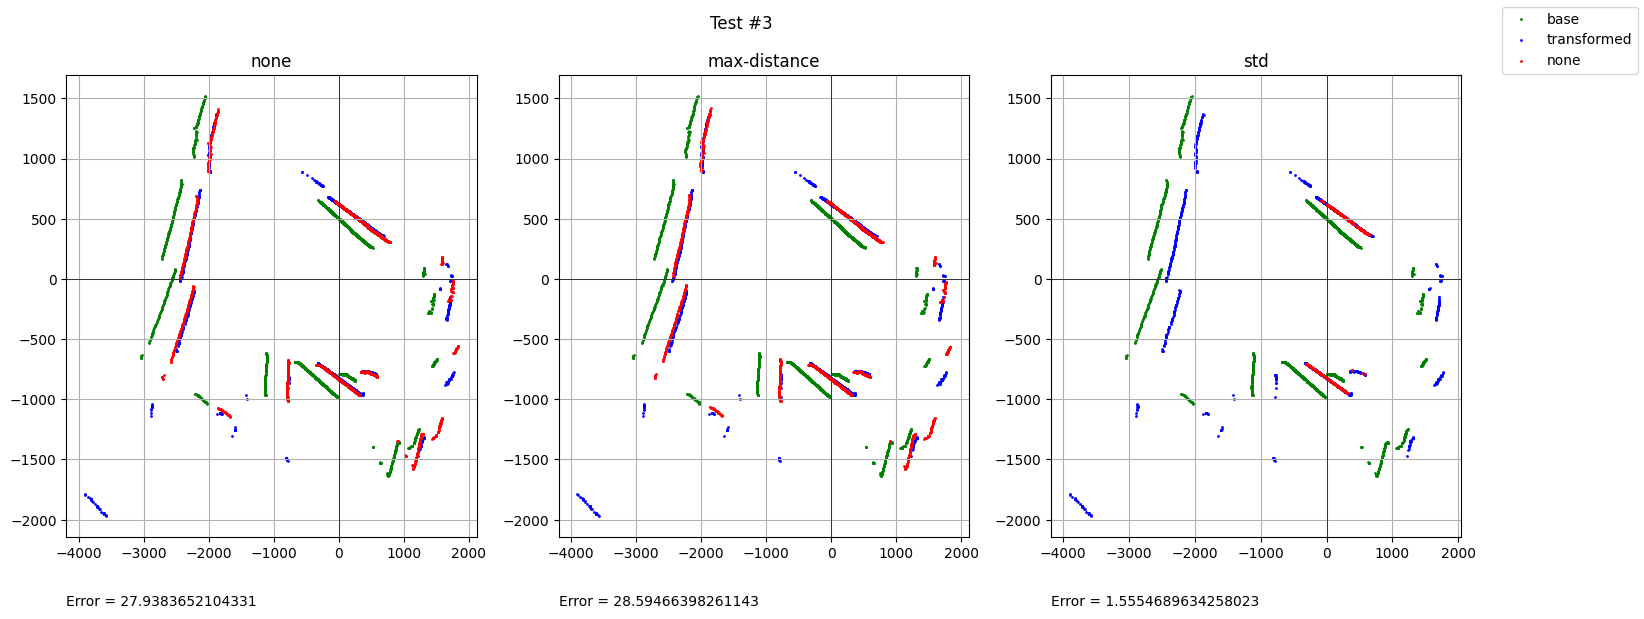

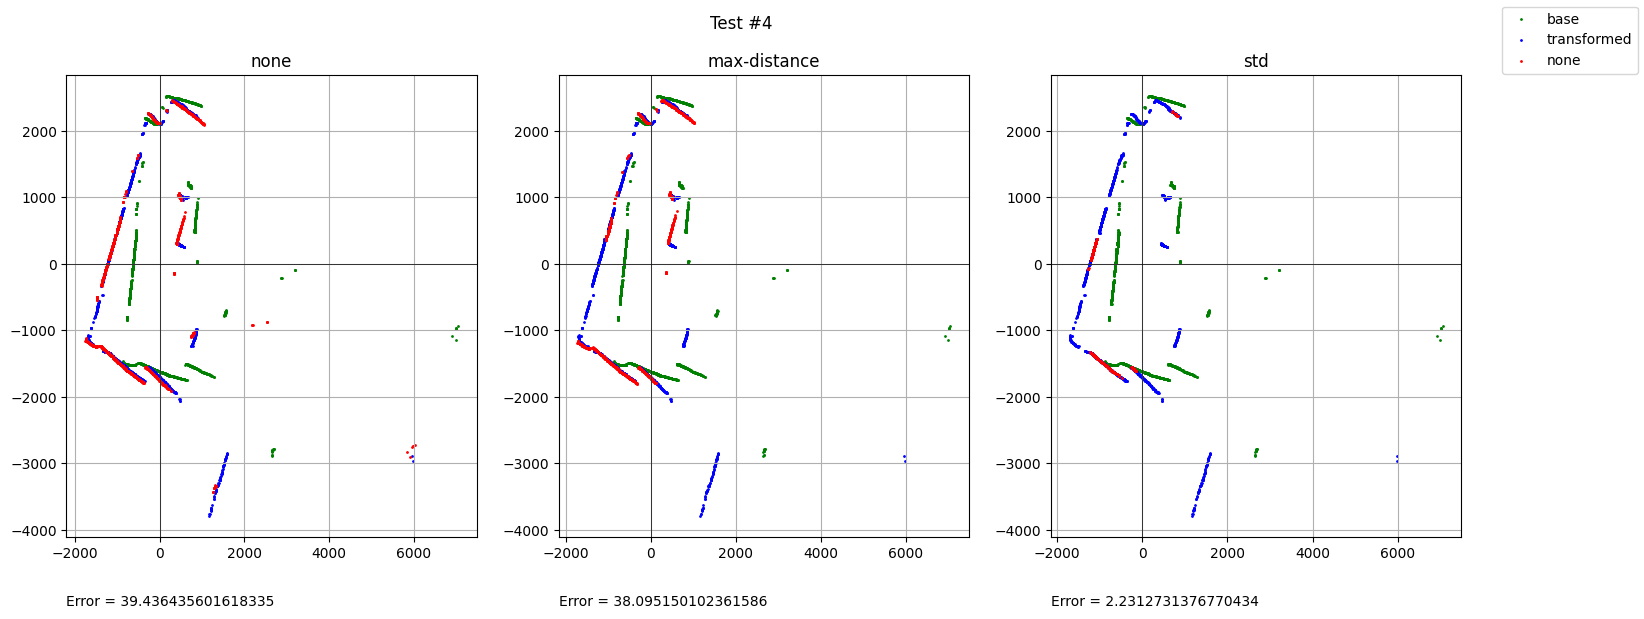

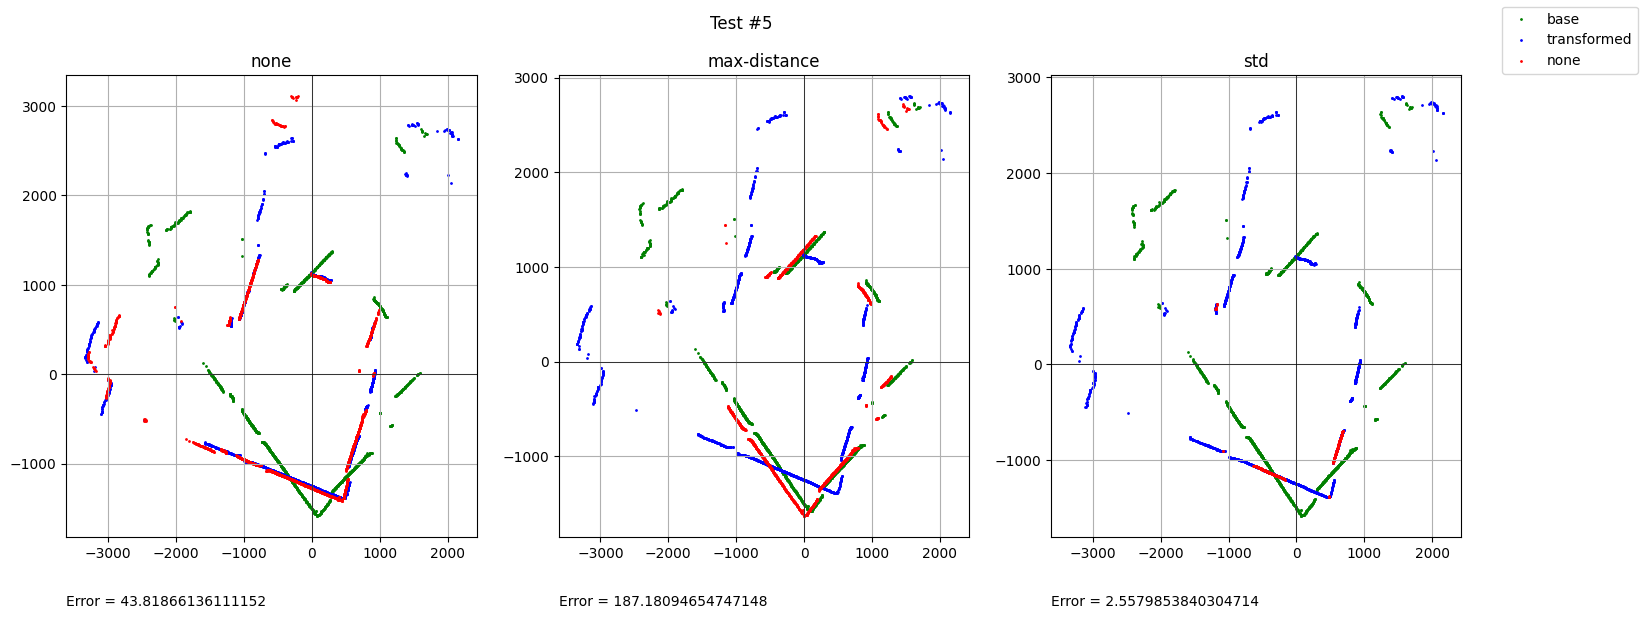

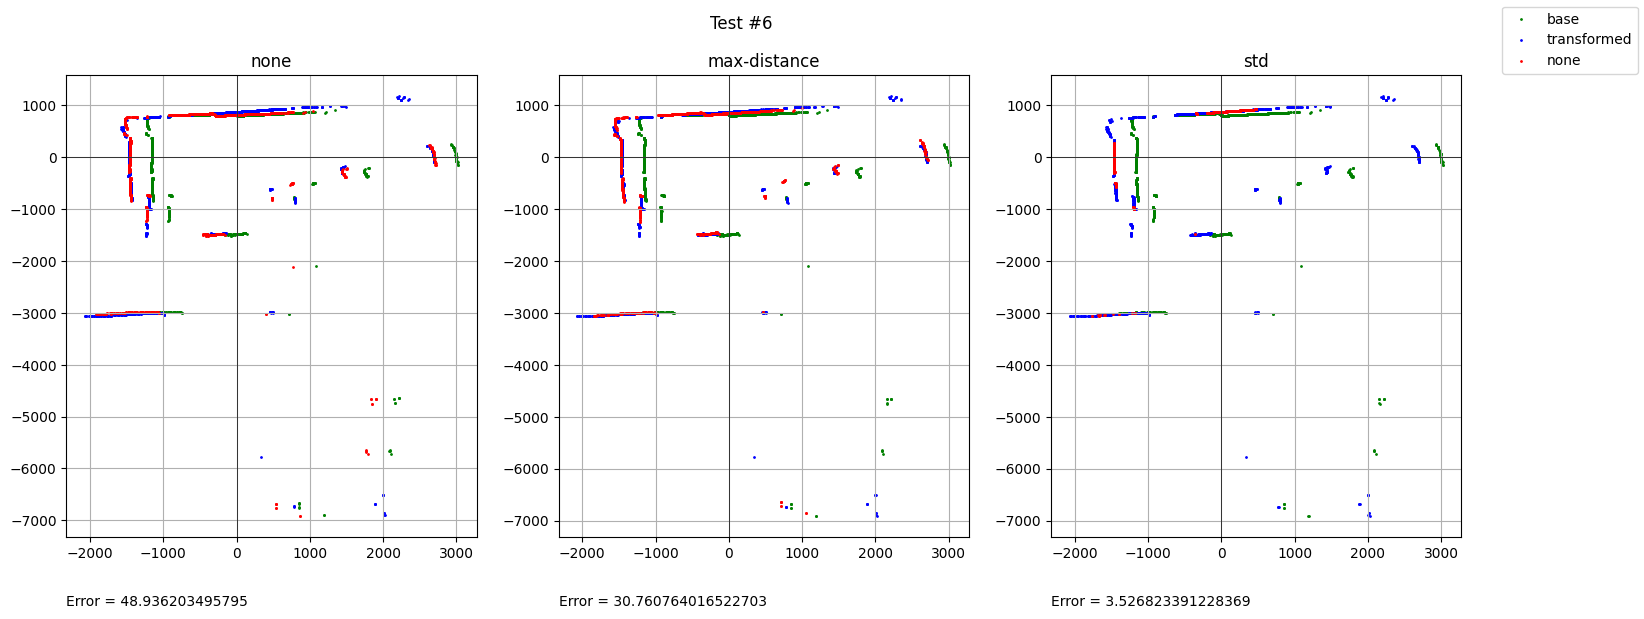

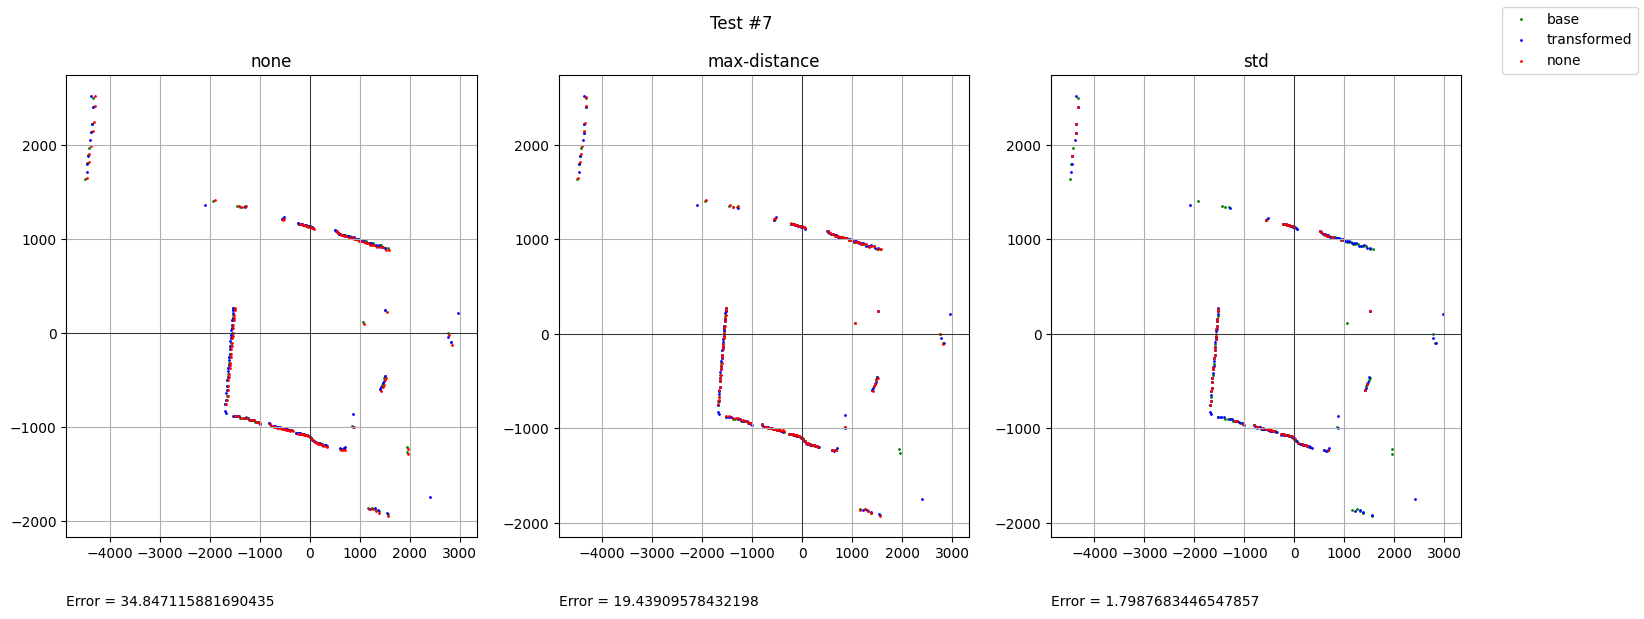

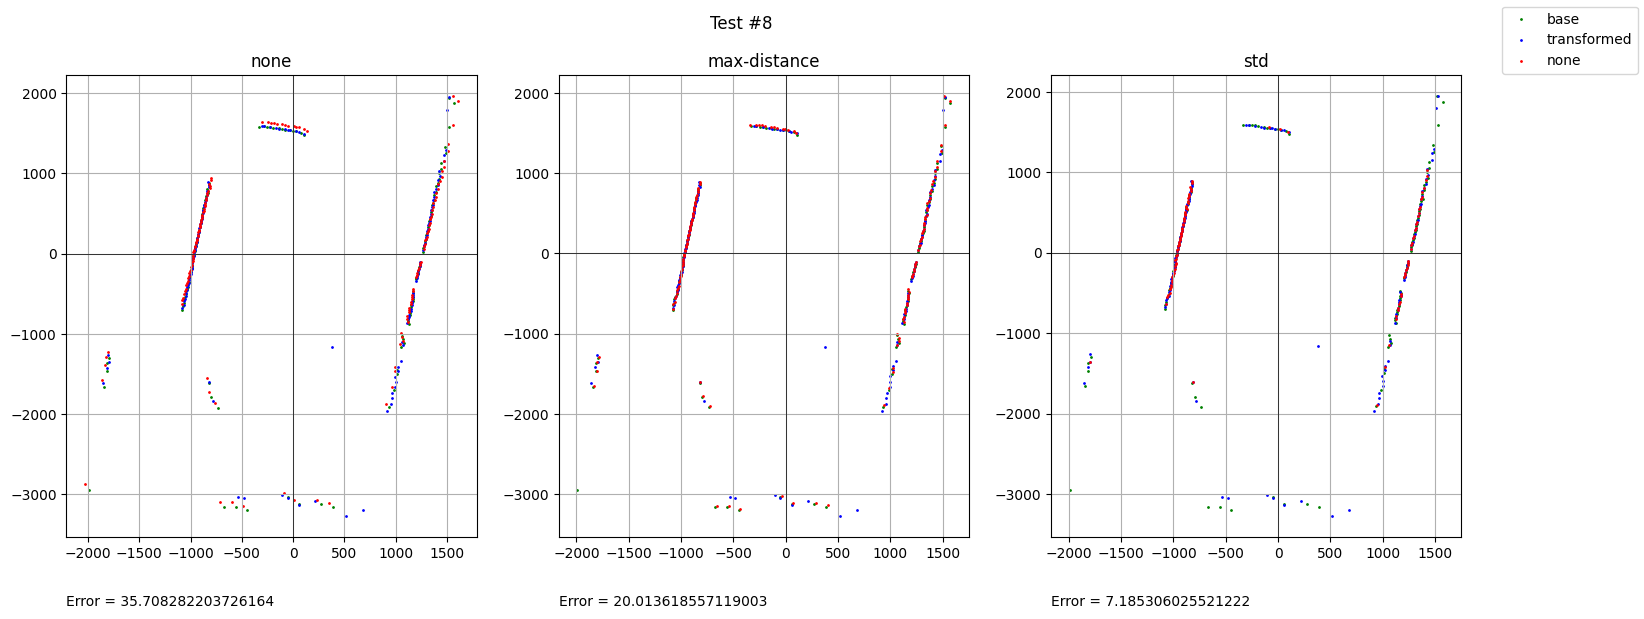

In [155]:
for test in tests:
  verify_test(test)